In [ ]:
!pip install torch torchvision matplotlib


Using device: cuda
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 44.7M/44.7M [00:00<00:00, 199MB/s]
100%|██████████| 170M/170M [00:03<00:00, 43.5MB/s]


Epoch [1/5], Loss: 0.8481
Epoch [2/5], Loss: 0.6266
Epoch [3/5], Loss: 0.5937
Epoch [4/5], Loss: 0.5797
Epoch [5/5], Loss: 0.5699

✅ Training complete using Pre-trained ResNet18 as Feature Extractor.



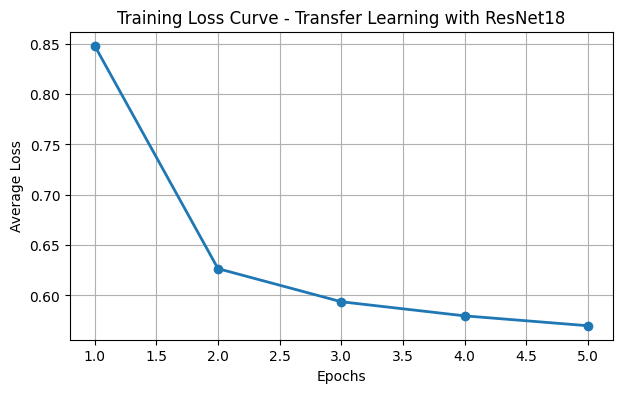

In [ ]:
# lab14_transfer_learning_feature_extractor_with_graph.py
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load pre-trained ResNet18
model = models.resnet18(pretrained=True)

# Freeze all convolutional layers to use as feature extractor
for param in model.parameters():
    param.requires_grad = False

# Replace the final layer to match CIFAR-10 (10 classes)
model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)

# Data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load dataset (CIFAR-10)
trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# Lists to store loss values for graph
loss_values = []

# Training for a few epochs
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(trainloader)
    loss_values.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

print("\n✅ Training complete using Pre-trained ResNet18 as Feature Extractor.\n")

# Plot the training loss graph
plt.figure(figsize=(7, 4))
plt.plot(range(1, epochs + 1), loss_values, marker='o', linestyle='-', linewidth=2)
plt.title("Training Loss Curve - Transfer Learning with ResNet18")
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.grid(True)
plt.show()
